# <div style="text-align:center"><u>Lois de Kepler</u></div>


## *Dans ce TP, vous effectuez les modifications demandées et vous répondez aux questions sur une copie*  
### 1- Observez les trajectoire de planètes du système solaire
### 2- Vitesse et aires balayées par deux Mars et Mercure
### 3- Déterminer la masse de Saturne


### Excécuter les cellules dans l'ordre après les avoir complétées si nécessaires

In [1]:
# importation du module pour tracer les graphiques
import matplotlib.pyplot as plt

#insertion des graphique directement dans la page
%matplotlib notebook

# pour tracer des polygones (pour nous des triangles)
from matplotlib.patches import Polygon

#importation du module pour manipuler simplement des tableaux de données 
import numpy as np

#calcul de l'aire d'un triangle par la formule de Heron
# xA,yA,xB,YB position de la planéte entre les deux positions A et B
from math import sqrt,pi
def surface(xA, yA, xB, yB):
    """ calcule la surface d'un triangle OAB (O est l'origine du repère) 
    xA, yA, xB, yB sont les coordonnées des sommets A et B """
    a = sqrt(xA**2 + yA**2)
    b = sqrt(xB**2 + yB**2)
    c = sqrt((xB - xA)**2 + (yB - yA)**2)
    p = (a + b + c) / 2 
    s = sqrt(p * (p-a) * (p-b) * (p-c)) # formule de Héron
    return s

# module utile pour la modélisation
from scipy.optimize import curve_fit

Pour tout ce TP, les données astronomiques ont été récupérées sur le site https://ssp.imcce.fr/forms


# <div style="text-align:center">1 <sup>ère</sup> Lois de Kepler</div>

![Planètes](mvtm.png "Wikipedia")

On dispose de 4 fichiers des données extraites du site indiqué ci-dessus (mercure.txt, venus.txt, terre.txt, mars.txt)
On dispose des positions des planètes tous les jours sur une révolution complète de la planète autour du soleil.
<table>
    <tr><th>Planète</th><th>Période de révolution en jours</th></tr>
    <tr><td>Mercure</td><td>88</td></tr>    
    <tr><td>Vénus</td><td>224</td></tr>    
    <tr><td>Terre</td><td>365</td></tr>    
    <tr><td>Mars</td><td>687</td></tr>    
</table>

Exemple : Vénus 
On a récupéré 240 positions de la planète à partir du 1 Janvier 2020 avec les paramètres suivant :<br>
Corps du système solaire : Vénus (Planet)<br>
Époque : 2020-01-01T00:00:00.000 / +240 / 1 Jour / UTC<br>
Système de coordonnées (ICRF) : Héliocentre – Écliptique – Astrométrique J2000 – Cartésiennes<br>
Options : INPOP17  <br>
Éphémérides de position  <br>
Colonnes :<br>
1: Date (undefined)<br>
2: px (au)<br>
3: py (au)<br>
4: pz (au)<br>
5: Dobs (au)<br>
6: Phase (deg)<br>
7: VMag (mag)<br>
8: vx (au/d)<br>
9: vy (au/d)<br>
10: vz (au/d)<br>
11: RV (km/s)<br>



Le fichier venus.txt enregistré comporte une première ligne donnant la légende des colonnes, puis 240 lignes contenant les données dont voici un extrait :
<table style="font-size:0.8em">
<tr><td>Date(undefined)</td><td>px(au)</td><td>py(au)</td><td>pz(au)</td><td>Dobs(au)</td><td>Phase(deg)</td><td>VMag(mag)</td><td>vx(au/d)</td><td>vyau/d)</td><td>vz(au/d)</td><td>RV(km/s)</td></tr><tr><td>2020-01-01T00:00:00.000</td><td>0.72320558308</td><td>0.052480240802</td><td>-0.041013991286</td><td>0.726266231181</td><td>0</td><td>-6.57</td><td>-0.001545369557</td><td>0.02008146534</td><td>0.00036472944</td><td>-0.187622</tr><tr><td>2020-01-02T00:00:00.000</td><td>0.721381062421</td><td>0.072538861991</td><td>-0.040633466289</td><td>0.726156733978</td><td>0</td><td>-6.57</td><td>-0.002103476503</td><td>0.0200331643</td><td>0.000396273435</td><td>-0.191533</td></tr>
</table>

**Les données sont séparées par des points-virgules ;**   

## Affichage des positions
Le programme ci-dessous affiche les positions de la  planète Vénus autour du Soleil

<IPython.core.display.Javascript object>


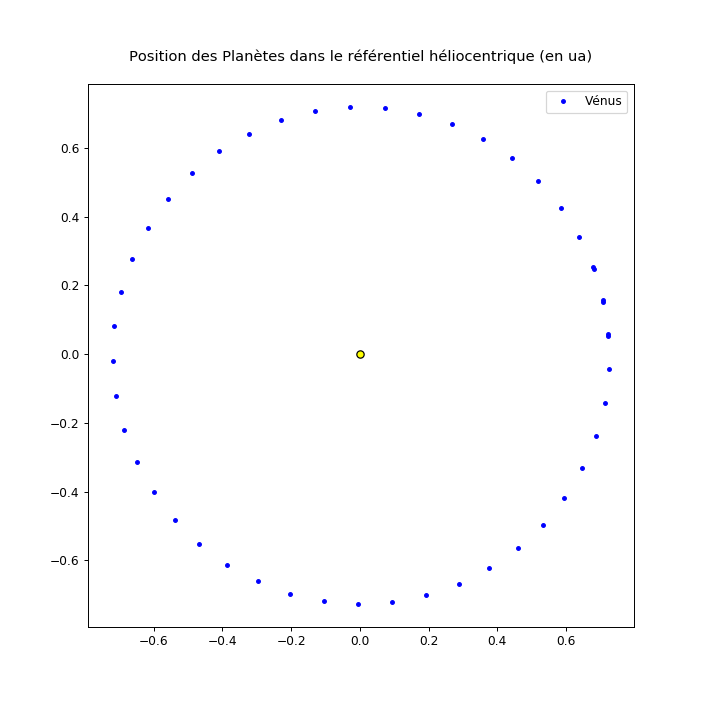

In [2]:
%matplotlib notebook
# Lecture des donnees x et y du fichier txt
# les positions px,py sont dans les deuxième et troisième colonnes 
# mais en informatique les index commence à zéro 
# donc la première colonne est numérotée 0, la seconde 1 etc... 

# pour charger les données on utilise np.loadtxt qui prend en paramètres:
#         le nom du fichier : venus.txt
#         unpack : faut-il déballer les données (ici True) 
#         usecols : les colonnes utilisées  (attention en informatique on compte à partir de zéro)
#         delimiter : le caractère qui sépare les données
#         skiprows : le nombre de ligne à ignorer (ici la première ligne contient de titre des colonnes)

#**************************                             A compléter                     ********************************
x,y= np.loadtxt('venus.txt', unpack=True, usecols=(1,2), delimiter = ';', skiprows = 1)





#***********************************************************************************************************************


#la fenêtre qui continedra le graphique
plt.figure('Première loi de Kepler',figsize=(8,8),dpi=80)
#scatter permet de tracé un nuage de points
plt.scatter(0, 0,facecolor="yellow",edgecolor="black")

#choix des données à afficher
#tracé de la trajectoire tous les 5 jours
# x[debut:fin:intervalle] 
#lorsqu'on ne précise pas de valeur début est le début des données , fin : la fin et intervalle vaut 1

#attention à la cohérence entre x et y


#**************************                             A compléter                     ********************************
plt.plot(x[::5],y[::5] , 'b.',label='Vénus')





#***********************************************************************************************************************

#repère orthonormé
plt.axis("equal")
#titre du graphique
plt.title("Position des Planètes dans le référentiel héliocentrique (en ua)\n")
# afficher la légende des courbes
plt.legend()
plt.show()


### Questions :
1- Modifiez le programme pour afficher les 4 premières planètes du système solaire sur le graphique   
2- Décrivez la nature des trajectoires (rectiligne, parabolique,  circulaire, elliptique...) dans le référentiel terrestre  
3- Quelle est la position du soleil pour chaque trajectoire  


# <div style="text-align:center">2 <sup>ième</sup> Lois de Kepler</div>



# Vecteur Vitesse

### dessiner un vecteur
Pour rajouter les vitesses sous forme de vecteur, il faut utiliser le module axes()  ax=plt.axes()   

On trace le vecteur de coordonnées $ \overrightarrow {v} $   (vx,vy) à la position du centre d'inertie de Vénus G(x,y)  

avec la fonction arrow qui prend en paramètres:
    x,y : la position
    vx,vy : le vecteur (éventuellement multiplié par un facteur d'échelle pour adapter sa taille)
    head_width, head_length : la largeur et la longuer de la pointe de la flèche
    fc : la couleur de la fléche (facecolor)
    ec : la couleur du  tour de la flèche (edgecolor)

ax.arrow(x,y, vx*echelle, vy*echelle, head_width=0.05, head_length=0.07, fc='blue', ec='blue')

### faire une boucle
for t in range(debut,fin,pas):   
    instructions... 
    
L'instruction for permet de répéter la suite d'instructions décalée pour les valeurs de t allant de debut jusqu'à fin non atteinte  en ajoutant à chaque fois la valeur du pas

Par exemple,
for t in range(0,10,2):
    print(t)
    
Affichera 0,2,4,6,8  

### Exemple : Mars
Dans ce programme nous affichons la position de Mars tous les 100 jours ainsi que le vecteur vitesse en chacune des positions.

<IPython.core.display.Javascript object>


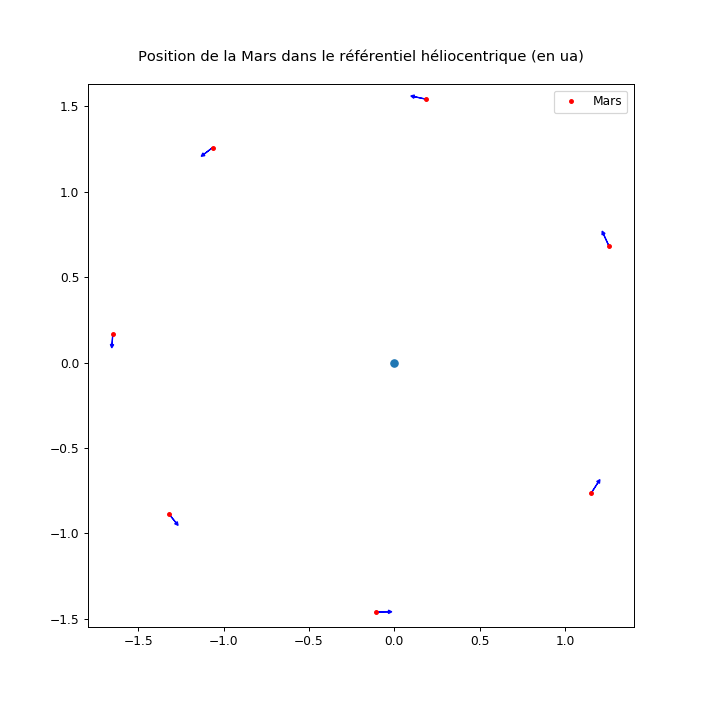

C:\Users\Utilisateur\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [3]:
%matplotlib notebook
#nous récupérons la vitesse en plus de la position

x1,y1,vx1,vy1= np.loadtxt('mars.txt', unpack=True, usecols=(1,2,7,8), delimiter = ';', skiprows = 1)
x2,y2,vx2,vy2= np.loadtxt('mercure.txt', unpack=True, usecols=(1,2,7,8), delimiter = ';', skiprows = 1)
# on trace les positions tous les 10 jours

plt.figure('Vitesse orbitale de quelques planètes',figsize=(8,8),dpi=80)
plt.scatter(0, 0)
plt.axis('equal')


#**************************                             A modifier                     ********************************
plt.title("Position de la Mars dans le référentiel héliocentrique (en ua)\n")
plt.plot(x1[::100],y1[::100] , 'r.',label='Mars')

#on ajoute les vecteurs
ax=plt.axes()
#on crée une boucle qui va compter les dates t (en jour) à partir de 0 sur la longueur du nombre de positions, de 100 en 100
for t in range(0,686,100): 
    ax.arrow(x1[t],y1[t], vx1[t]*5, vy1[t]*5, head_width=0.02, head_length=0.02, fc='blue', ec='blue')  

#***********************************************************************************************************************

# afficher la légende des courbes
plt.legend()
plt.show()



## Questions 
1- Que peut-on dire de la vitesse de la planète Mars ?   
2- Qualifiez alors la nature du mouvement.   
3- Modifiez le programme pour dessiner les vecteurs vitesses sur la trajectoire de Mercure  tous les 10 jours avec la même échelle
4- Comparez la vitesse de Mercure à celle de Mars. Conclure sur la relation entre la vitesse et la distance au Soleil
5- Que peut-on dire de la valeur de la vitesse de Mercure aux différentes dates ? 
6- Afficher les deux planètes avec leurs vitesses simultanément


# Loi des aires

![Mars](mars.png "Wikipedia")

## Tracé de l'aire balayée
Nous allons maintenant tracer l'aire balayée par la planète lorsqu'elle s'est déplacé pendant les 20 premiers jours.
Pour cela, il suffit d'appeler la fonction Polygon
Polygon( [(x,y),(x1,y1),(x2,y2)],facecouleur='',edgevolor='')   
paramètres: 
    un tableau contenant les coordonnées des trois sommets du triangle
    la couleur avec lequel sera colorié le triangle (en gris on met un nombre compris entre 0 et 1)
    la couleur des côtés des triangles

## Calcul et affichage de l'aire
Nous utilisons la formule de Heron définie dans la première cellule qui permet de calculer l'aire d'un triangle dont on connait les coordonées de ses sommets.
Puisqu'un des sommets  est le soleil, il suffit de passer les coordonnées du point de départ et du point de fin de la planètes pour connaître la valeur de l'aire balayée.



<IPython.core.display.Javascript object>


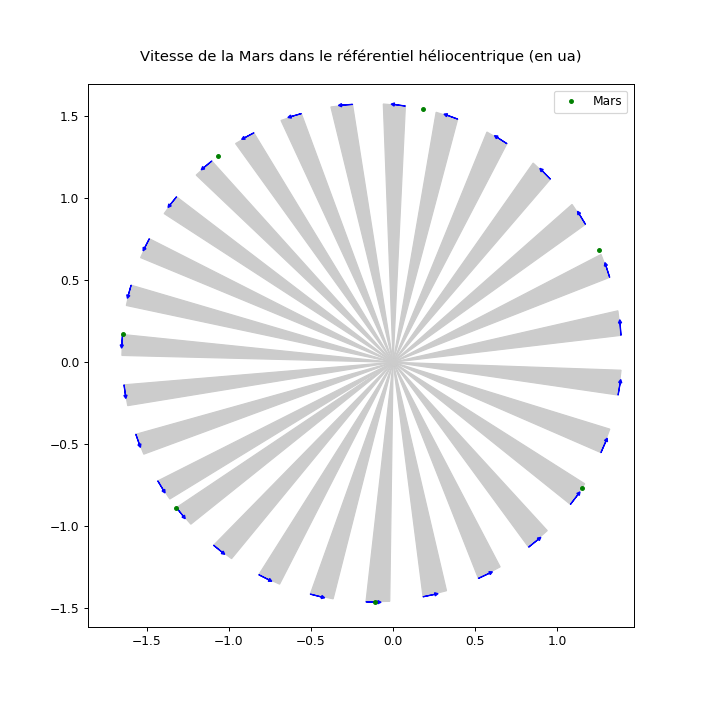

vitesse :23. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :24. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :24. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :25. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :25. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :27. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :27. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :26. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :25. km/s et aire balayée pendant 20 jours : 2.4e+15 km^2
vitesse :2

In [4]:
%matplotlib notebook
#nous récupérons la vitesse en plus de la position
x,y,vx,vy= np.loadtxt('mars.txt', unpack=True, usecols=(1,2,7,8), delimiter = ';', skiprows = 1)
# on trace les positions tous les 10 jours

plt.figure('Loi des aires',figsize=(8,8),dpi=80)
plt.scatter(0, 0,facecolor="yellow",edgecolor="black")

plt.plot(x[::100],y[::100] , 'g.',label='Mars')

plt.axis('equal')

#**************************                             A modifier                     ********************************

plt.title("Vitesse de la Mars dans le référentiel héliocentrique (en ua)\n")

#on ajoute les vecteurs
ax=plt.axes()
#on crée une boucle qui va compter les dates t (en jour) à partir de 0 sur la longueur du nombre de positions, de 24 en 24
for t in range(0,686,24):    
    ax.arrow(x[t],y[t], vx[t]*5, vy[t]*5, head_width=0.02, head_length=0.02, fc='blue', ec='blue')  

    
#dessin de l'aire balayée entre chaque multiple de 24 et pour une durée de 10 jours 
for t in range(0,687,24):
    triangle = Polygon([(0,0),(x[t],y[t]),(x[t+10],y[t+10])], facecolor='0.8', edgecolor='0.8')
    ax.add_patch(triangle) 
    #calcul de l'aire balayée
    aire= surface(x[t],y[t],x[t+10],y[t+10])
    #calcul de la vitess au premier jour du balayage
    vitesse=(vx[t]**2+vy[t]**2)**0.5
    print(f"vitesse :{vitesse*150e6/86400:#.2g} km/s et aire balayée pendant 20 jours : {aire*150e6*150e6:#.2g} km^2")


#***********************************************************************************************************************

# afficher la légende des courbes
plt.legend()
plt.show()



![Mercures](mercure.png "Mariner 10")

# Questions :
1- Modifiez le programme  pour tracer et calculer les aires toutes les 100 jours  sur une durée de 20 jours   
2- Quelle remarque pouvez-vous faire sur l'aire balayée ?  
3- Quelle remarque faites-vous sur la valeur de la vitesse de la planète?  
4- Modififiez le programme pour refaire le même travail sur la planète Mercure en traçant l'aire balayée pendant 4 jours tous les 16 jours.  
5- Quelle remarque pouvez-vous faire sur l'aire balayée ?  
6- Quelle remarque faites-vous sur la valeur de la vitesse de la planète ?  
7- Comment varie la vitesse de la planète lorsque celle-ci est proche du soleil ?  
8- Comment varie  la vitesse de la planète lorsque celle-ci est éloignée du soleil ?  

# <div style="text-align:center">3 <sup>ième</sup> Lois de Kepler</div>

Le carré de la période de révolution est proportionnelle au cube du demi grand axe a de l'ellipse et ne dépend pas de la masse du satellite considéré.

# <div style="text-align:center">$T^2 = k \times a^3$</div>


La théorie indique que $k = \dfrac{4\pi ^2}{G M}$ ($M$ est la masse de l'astre attracteur).  
#### G = 6.67e<sup>-11</sup> USI (programmé 6,67.10^-11 en Python)

Dans la suite, nous allons nous intéresserà 20 satellites naturels d'une planète : SATURNE  
Le fichier <b>satellite_saturne.txt</b> contient les données suivantes :
<table><tr><th>Nom</th><th>Diamètre(km)</th><th>Masse(10E18 kg)</th><th>Demi-grand axe(km)</th><th>Période orbitale(jour)</th><th>Inclinaison(°)</th><th>Excentricité</th><th>Position</th><th>Année de</th><th>Découvreur</th></tr><tr><td>S/2009 S 1</td><td>0.3</td><td>0.0000001</td><td>117000</td><td>0.4715</td><td>0°</td><td>0</td><td>Division de Cassini</td><td>2009</td><td>Cassini-Huygens</td></tr><tr><td>Pan</td><td>28.4</td><td>0.00495</td><td>133583</td><td>0.575</td><td>0.0°</td><td>0</td><td>Division d'Encke</td><td>1990</td><td>Mark Showalter</td></tr><tr><td>Daphnis</td><td>7.8</td><td>0.000084</td><td>136500</td><td>0.594</td><td>0.0°</td><td>0</td><td>Lacune de Keeler</td><td>2005</td><td>Cassini-Huygens</td></tr><tr><td>Atlas</td><td>30.2</td><td>0.0066</td><td>137670</td><td>0.6019</td><td>0.003°</td><td>0.0012</td><td>Anneau A (berger externe)</td><td>1980</td><td>Voyager 2</td></tr><tr><td>Prométhée</td><td>86.2</td><td>0.1566</td><td>139353</td><td>0.613</td><td>0.008°</td><td>0.0022</td><td>Anneau F (berger interne)</td><td>1980</td><td>Voyager 2</td></tr><tr><td>Pandore</td><td>80.6</td><td>0.1356</td><td>141700</td><td>0.6285</td><td>0.050°</td><td>0.0042</td><td>Anneau F (berger externe)</td><td>1980</td><td>Voyager 2</td></tr><tr><td>Épiméthée</td><td>113.4</td><td>0.5307</td><td>151410</td><td>0.6942</td><td>0.351°</td><td>0.0098</td><td>Co-orbital avec Janus</td><td>1977</td><td>J. Fountain and S. Larson</td></tr><tr><td>Janus</td><td>179.2</td><td>1.8891</td><td>151460</td><td>0.6945</td><td>0.163°</td><td>0.0068</td><td>Co-orbital avec Épiméthée</td><td>1966</td><td>A. Dollfus</td></tr><tr><td>Égéon</td><td>0.5</td><td>0.0000001</td><td>167500</td><td>0.8081</td><td>0.001°</td><td>0.0002</td><td>Dans l'anneau G</td><td>2008</td><td>Cassini-Huygens</td></tr><tr><td>†Mimas</td><td>396.4</td><td>37.493</td><td>185520</td><td>0.9424218</td><td>1.53°</td><td>0.0202</td><td></td><td>1789</td><td>W. Herschel</td></tr><tr><td>Méthone</td><td>3.2</td><td>0.00002</td><td>194440</td><td>1.01</td><td>0.0072°</td><td>0.0001</td><td>Groupe des Alcyonides</td><td>2004</td><td>Cassini-Huygens</td></tr><tr><td>Anthée</td><td>2</td><td>0.000005</td><td>197700</td><td>1.04</td><td>0.1°</td><td>0.001</td><td>Groupe des Alcyonides</td><td>2007</td><td>Cassini-Huygens</td></tr><tr><td>Pallène</td><td>4.4</td><td>0.00006</td><td>212280</td><td>1.14</td><td>0.1810°</td><td>0.004</td><td>Groupe des Alcyonides</td><td>2004</td><td>Cassini-Huygens</td></tr><tr><td>†Encelade</td><td>504.2</td><td>108.022</td><td>238020</td><td>1.370218</td><td>0.00°</td><td>0.0045</td><td>Anneau E</td><td>1789</td><td>W. Herschel</td></tr><tr><td>†Téthys</td><td>1 066</td><td>617.449</td><td>294660</td><td>1.887802</td><td>1.86°</td><td>0</td><td></td><td>1684</td><td>G. Cassini</td></tr><tr><td>Télesto</td><td>24.8</td><td>0.01</td><td>294660</td><td>1.8878</td><td>1.158°</td><td>0.001</td><td>Point de Lagrange avant de Téthys</td><td>1980</td><td>B. Smith. H. Reitsema. S. Larson. and J. Fountain</td></tr><tr><td>Calypso</td><td>21.2</td><td>0.0065</td><td>294660</td><td>1.8878</td><td>1.473°</td><td>0.001</td><td>Point de Lagrange arrière de Téthys</td><td>1980</td><td>D. Pascu. P. Seidelmann. W. Baum. and D. Currie</td></tr><tr><td>†Dioné</td><td>1 123.40</td><td>1 095.45</td><td>377400</td><td>2.736915</td><td>0.02°</td><td>0.0022</td><td></td><td>1684</td><td>G. Cassini</td></tr><tr><td>Hélène</td><td>33</td><td>0.02446</td><td>377400</td><td>2.7369</td><td>0.0°</td><td>0.005</td><td>Point de Lagrange avant de Dioné</td><td>1980</td><td>P. Laques and J. Lecacheux</td></tr><tr><td>Pollux</td><td>2.6</td><td>0.00001</td><td>377200</td><td>2.74</td><td>0.1774°</td><td>0.0192</td><td>Point de Lagrange arrière de Dioné</td><td>2004</td><td>Cassini-Huygens</td></tr></table>

<a href="https://fr.wikipedia.org/wiki/Satellites_naturels_de_Saturne" target="_blank">Sources Wikipedia</a>


![Satellites de Saturne](saturne.jpg "Satellites et anneaux de Saturne (photomontage de l'Agence spatiale européenne)")

## Objectif : 
### Déterminer la masse de saturne à partir de ces données

1- Extraire les données utilises pour tracer la courbe $T^2 = k \times a^3$ 

In [ ]:
#**************************                             A compléter                     ********************************

#Compléter l'instruction permettant de charger les données nécessaires 

a,T= np.loadtxt('                 ', unpack=True, usecols=(    ,             ), delimiter = ';', skiprows = 1)

#calculer les valeurs à mettre en abscisse et ordonnées
#en corrigeant les unités pour avoir des m et des s (1journée =86400s)

abscisses=
ordonnees=

#***********************************************************************************************************************

2- Modéliser la courbe pour déterminer k

In [ ]:
#**************************                             A compléter                     ********************************

#donner l'expression du modèle à utiliser derrière l'instruction return à partir des variables passées à la fonction
def modele(x,k):
    return 

#curve_fit prend trois paramètres et renvoie deux variables  
#    paramètres :
#      le modèle choisi, le tableau des valeurs en abscisses, le tableau des valeurs en ordonnées
#    resultats :
#      resultats : un tableau avec les paramètres de la modélisation
#      covariance : pour les calculs d'incertitude non utilisées ici

#compléter la fonction curve_fit
resultats, covariance =  curve_fit(           ,       ,            )


#***********************************************************************************************************************

# pour extraire le seul paramètre du tableau 
k = resultats[0]
print(f"k = {k:#.2g} USI")



3- Tracer les courbes (points expérimentaux et modèle)
Le modèle est-il vérifié ?

In [ ]:
%matplotlib inline
plt.figure('Masse de Saturne',figsize=(5,5),dpi=80)

#calcul de la modélisation
ordonnees_modele=modele(abscisses,k)

#**************************                             A compléter                     ********************************
#plot prend trois paramètres (x,y,type de point)

#type de point une lettre pour la couleur(r,b,g ) et un signe pour le type de dessin:o pour un rond,- pour tracer une ligne

#tracé des points expérimentaux
plt.plot(       ,        ,'        ')

#tracé de la modélisation (ligne rouge )

plt.plot(    ,       ,'           ')

#***********************************************************************************************************************


plt.show()

4- Vérifier votre valeur avec Wikipedia : <a href="https://fr.wikipedia.org/wiki/Saturne_(plan%C3%A8te)" target=_blank>Saturne sur Wikipedia</a>

In [ ]:
#**************************                             A compléter                     ********************************


# programmer la formule permettant de calculer la masse de Saturne à partir de la troisième loi de Newton
M = 4*pi**2/(6.67e-11*k)

#***********************************************************************************************************************



print(f"La masse de Saturne est m = {M:#.2g} kg")



